### Import Dataset

Import library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# Menampilkan seluruh baris pada dataframe
pd.set_option('display.max_rows', None) 
# Menampilkan seluruh kolom pada dataframe
pd.set_option('display.max_columns', None) 
warnings.filterwarnings('ignore')

Mengunggah dataset : 

application train, previous application, dan bureau.

In [4]:
# Menghubungkan google colab ke grive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Impor dataset application_train
application_train = pd.read_csv("/content/drive/MyDrive/Dataset/Zenius/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Impor dataset previous_application
previous_application = pd.read_csv("/content/drive/MyDrive/Dataset/Zenius/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Impor dataset bureau
bureau = pd.read_csv("/content/drive/MyDrive/Dataset/Zenius/bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Jumlah peminjaman Home Credit sebelumnya pada tiap pelanggan.

In [8]:
# Membuat variabel total previous
prev = previous_application.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
prev.columns = ['SK_ID_CURR','TOTAL_PREV']
prev.head()

,SK_ID_CURR,TOTAL_PREV
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


Jumlah kredit tiap pelanggan di Biro Kredit.

In [9]:
# Membuat variabel bureau loan
bureau_credit = bureau.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
bureau_credit.columns = ['SK_ID_CURR','TOTAL_BUREAU_LOAN']
bureau_credit.head()

,SK_ID_CURR,TOTAL_BUREAU_LOAN
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


Menggabungkan dataset previous application dan bureau kredit dengan left join.

In [10]:
df = (application_train.merge(prev, how='left', on='SK_ID_CURR')).merge(bureau_credit, how='left', on='SK_ID_CURR')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Data Understanding

Memeriksa adanya missing value pada dataset.

In [11]:
total_null = df.isnull().sum() 
persen = (df.isnull().sum()/len(df.index)*100) 
data_null  = pd.concat([total_null, persen], axis=1, keys=['Total Null', 'Persen']).reset_index() 

In [12]:
data_null[(data_null['Persen'] > 0)].sum()

index         AMT_ANNUITYAMT_GOODS_PRICENAME_TYPE_SUITEOWN_C...
Total Null                                              9212939
Persen                                              2995.970551
dtype: object

In [13]:
# Menampilkan kolom dengan persentase null lebih dari 60 
data_null[(data_null['Persen'] > 60)].sort_values(by='Persen', ascending=False) 

,index,Total Null,Persen
76,COMMONAREA_MEDI,214865,69.872297
48,COMMONAREA_AVG,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
86,FONDKAPREMONT_MODE,210295,68.386172
54,LIVINGAPARTMENTS_AVG,210199,68.354953
82,LIVINGAPARTMENTS_MEDI,210199,68.354953
68,LIVINGAPARTMENTS_MODE,210199,68.354953


*   Pada dataset ini, terdapat 69 variabel yang memiliki missing value.
*   Terdapat 17 variabel dengan jumlah missing value >60%.

Memeriksa data duplikat pada dataset.

In [14]:
df.duplicated().sum()

0

Dataset tidak memiliki data duplikat.

Melihat tipe data pada dataset.

In [15]:
df.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

*   Ada 67 Feature bertipe float.
*   Ada 41 Feature bertipe integer.
*   Ada 16 Feature bertipe object.




#### Exploratory Data Analysis

Feature Target :
*   0 : pinjaman dibayar tepat waktu.
*   1 : terdapat kesulitan untuk membayar pinjaman.



In [16]:
# Melihat jumlah target 0 dan 1
df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

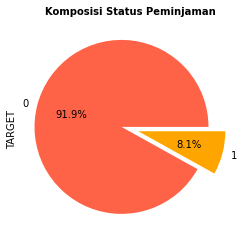

In [17]:
# Menampilkan komposisi status pinjaman
plt.title("Komposisi Status Peminjaman", fontsize=10, weight="bold")
df["TARGET"].value_counts().plot.pie(explode=[0.1,0.1], labels=["0","1"], autopct='%1.1f%%', colors=['tomato','orange']);

Komposisi status peminjaman yang dibayar tepat waktu sebanyak 91.9%. Hal ini menunjukkan bahwa mayoritas peminjam sudah membayar pinjaman tepat waktu. Selain itu, terdapat 8.1% pelanggan yang masih terdapat kesulitan untuk membayar pinjaman.

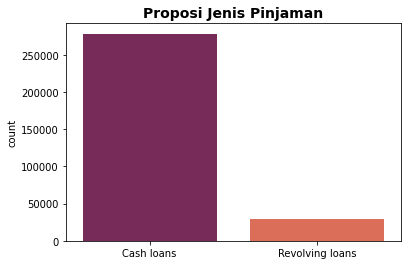

In [18]:
# Menampilkan proporsi jenis pinjaman
plt.title("Proposi Jenis Pinjaman", fontsize=14, weight="bold")
sns.countplot(df.NAME_CONTRACT_TYPE.values, data=df, palette='rocket')
plt.show()

*   Cash loans merupakan kredit yang berupa penyediaan dana tunai yang dipindahbukukan ke rekening nasabah untuk digunakan sesuai dengan tujuan kreditnya.
*   Revolving Loans merupakan kredit untuk pembiayaan modal kerja yang bersifat permanen yang jumlahnya tercermin dalam cash flow perusahaan.
*   Berdasarkan grafik di atas, diketahui bahwa mayoritas peminjam melakukan peminjaman uang dengan tipe pinjaman Cash loans.

In [19]:
# Melihat jumlah masing-masing tipe gender
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

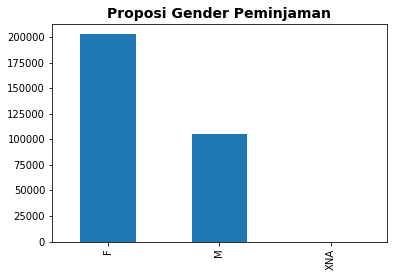

In [20]:
# Menampilkan proporsi gender peminjam
plt.title("Proposi Gender Peminjaman", fontsize=14, weight="bold")
df["CODE_GENDER"].value_counts().plot.bar();

Pada grafik diketahui, proporsi gender peminjam perempuan lebih banyak daripada laki-laki dan terdapat variabel yang tidak diketahui, yaitu "XNA".

In [21]:
# Melihat jumlah peminjam berdasarkan jumlah anak
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

Pada data di atas, diketahui bahwa mayoritas peminjam tidak memiliki anak.

In [22]:
# Melihat jumlah peminjam berdasarkan status pernikahannya
df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

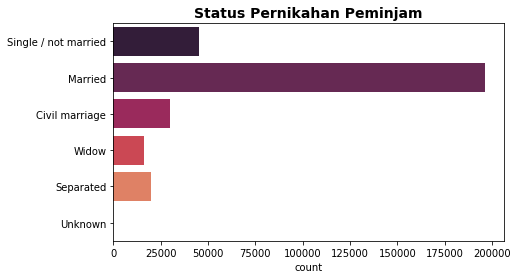

In [23]:
# Menampilkan proporsi status pernikahan peminjam
plt.figure(figsize=(7,4))
plt.title("Status Pernikahan Peminjam", fontsize=14, weight="bold")
sns.countplot(y = df.NAME_FAMILY_STATUS.values, data=df, palette= 'rocket')
plt.show()

Berdasarkan grafik di atas, mayoritas peminjam sudah berstatus menikah sehingga dapat diasusmsikan bahwa peminjam yang telat untuk membayarkan pinjaman mereka karena harus mengeluarkan uangnya untuk kebutuhan rumah tangga.

In [24]:
# Melihat jumlah peminjam berdasarkan tempat tinggalnya
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

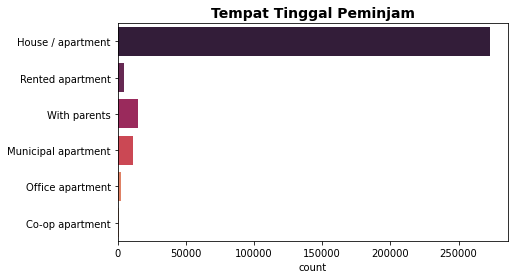

In [25]:
# Menampilkan proporsi tempat tinggal peminjam
plt.figure(figsize=(7,4))
plt.title("Tempat Tinggal Peminjam", fontsize=14, weight="bold")
sns.countplot(y = df.NAME_HOUSING_TYPE.values, data=df, palette= 'rocket')
plt.show()

Pada grafik diketahui bahwa mayoritas peminjam memiliki rumah/apartemen sendiri sebagai hunian mereka. Hal ini membuktikan bahwa terdapat kemungkinan peminjam tidak mampu membayarkan pinjaman mereka karena peminjam harus membayarkan angsuran rumah/apartemen.

In [26]:
# Melihat jumlah peminjam berdasarkan status pendidikan
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

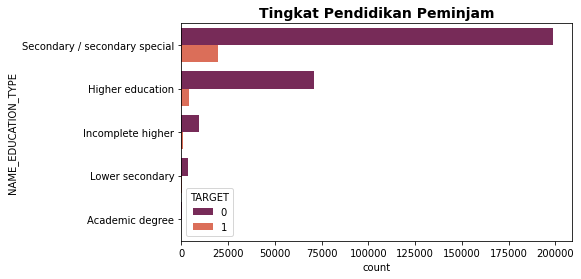

In [27]:
# Menampilkan proporsi pekerjaan peminjam
plt.figure(figsize=(7,4))
plt.title("Tingkat Pendidikan Peminjam", fontsize=14, weight="bold")
pendidikan = sns.countplot(data=df, y='NAME_EDUCATION_TYPE', hue='TARGET',palette = "rocket");
plt.show()

Berdasarkan grafik, tingkat pendidikan peminjam didominasi oleh tingkat pendidikan Secondary dan kebanyakan peminjam dengan tingkat pendidikan higher education dan secondary special dapat membayarkan pinjaman mereka.

Data group berdasarkan target dan jenis pekerjaan.

In [28]:
pekerjaan = pd.DataFrame(data=df.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

Jumlah pelanggan berdasarkan target dan jenis pekerjaan.

In [29]:
value_counts = pekerjaan['SK_ID_CURR'].values

def repayers_to_applicants_ratio(values):
    flag = 1
    rasio = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            rasio.append(current_number/(current_number+next_number))
            rasio.append(current_number/(current_number+next_number))
        flag=flag*-1
    return rasio        

Rasio pelanggan yang mampu membayar pinjaman berdasarkan jenis pekerjaan.

In [30]:
pekerjaan['Rasio R/A'] = repayers_to_applicants_ratio(value_counts)

In [31]:
# Membuat variabel untuk rasio peminjam berdasarkan tipe pekerjaannya
dfrasio = pekerjaan.groupby(['OCCUPATION_TYPE','Rasio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1).reset_index() 

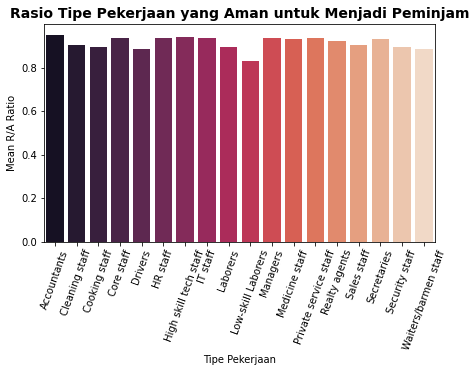

In [32]:
# Menampilkan proporsi rasio peminjam berdasarkan tipe pekerjaannya
plt.figure(figsize=(7,4))
plt.title("Rasio Tipe Pekerjaan yang Aman untuk Menjadi Peminjam", fontsize=14, weight="bold")
sns.barplot(x='OCCUPATION_TYPE', y='Rasio R/A', data=dfrasio, palette=('rocket'))
plt.xticks(rotation=70)
plt.xlabel("Tipe Pekerjaan")
plt.ylabel("Mean R/A Ratio")
plt.show()

Pada grafik diperoleh bahwa tipe pekerjaan akuntan yaitu tipe pekerjaan yang dikategorikan aman untuk diberikan pinjaman oleh lembaga peminjam dengan Rasio 0.95, sedangkan tipe pekerjaan yang dikategorikan kurang aman untuk diberikan pinjaman adalah tipe pekerjaan buruh dengan keterampilan rendah *(low-skill laborers)* dengan rasio 0.82.

## **Data Preparation**

In [33]:
#Untuk mengetahui jumlah baris dan kolom yang dimiliki oleh dataframe df
df.shape

(307511, 124)

In [34]:
# Mengubah DAYS_BIRTH menjadi AGE 
df['AGE'] = round((df['DAYS_BIRTH']/-365), 0).astype(int)

# Menghapus kolom DAYS_BIRTH 
df.drop(columns='DAYS_BIRTH', inplace=True)

In [35]:
# Menampilkan deskripsi data AGE
df['AGE'].describe() 

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [36]:
# Membuat kelompok umur dari peminjam
grp_age = df[['TARGET', 'AGE']] 
grp_age['AGE_GROUP'] = pd.cut(grp_age['AGE'], bins = np.linspace(20, 70, num=6)) 

# Menampilkan rata-rata target dan age berdasarkan kelompok umur
grp_age = (grp_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET') 
grp_age

,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049247,63.682548
"(50.0, 60.0]",0.060363,55.455787
"(40.0, 50.0]",0.075819,45.258459
"(30.0, 40.0]",0.094346,35.615525
"(20.0, 30.0]",0.114449,26.887741


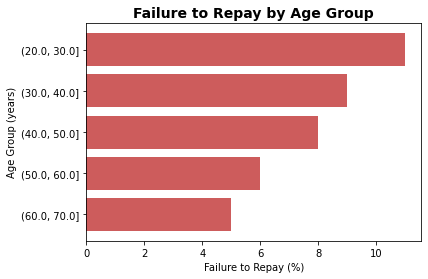

In [37]:
# Menampilkan proporsi tingkat gagal bayar dari setiap kelompok umur
plt.barh(grp_age.index.astype(str), round(100*grp_age['TARGET']), color='indianred')
plt.ylabel('Age Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group', fontsize=14, weight="bold");
plt.show()

Berdasarkan grafik, peminjam dengan rentang umur 20 tahun sampai 30 tahun lebih cenderung tidak membayar kembali pinjaman atau default dengan tingkat gagal bayar di atas 10%. 

In [38]:
# Mengubah DAYS_EMPLOYED menjadi YEARS EMPLOYED
df['YEARS_EMPLOYED'] = round((df['DAYS_EMPLOYED']/-365), 0).astype(int)

# Menghapus kolom DAYS_EMPLOYED
df.drop(columns='DAYS_EMPLOYED', inplace=True)

In [39]:
# Menampilkan deskripsi data Years Employed
df['YEARS_EMPLOYED'].describe()

count    307511.000000
mean       -174.895337
std         387.185661
min       -1001.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

Berdasarkan ringkasan statistik yang ditampilkan, dapat dilihat bahwa nilai min dari years employed adalah -1000 dan hal tersebut termasuk anomali karena tidak mungkin minimal kerja dari pelanggan adalah -1000 tahun. 

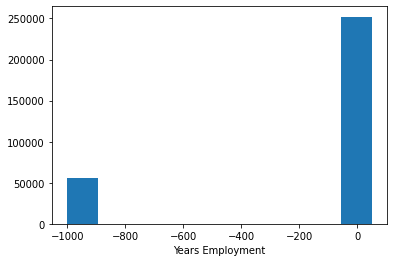

In [40]:
# Menampilkan distribusi data Years Employed
plt.hist(df['YEARS_EMPLOYED'])
plt.xlabel('Years Employment')
plt.show()

Berdasarkan grafik di atas, diketahui bahwa pada data YEAR EMPLOYED terdapat anomali.

In [41]:
# Mengganti anomali value atau min dengan NaN
df['YEARS_EMPLOYED'].replace({df['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)

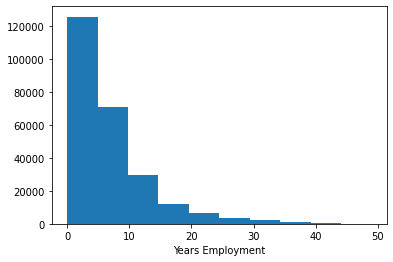

In [42]:
# Menampilkan distribusi Years Employed setelah menangani anomali
plt.hist(df['YEARS_EMPLOYED'])
plt.xlabel('Years Employment')
plt.show()

In [43]:
# Membuat kelompok lama kerja peminjam dalam tahun 
grp_employ = df[['TARGET', 'YEARS_EMPLOYED']] 
grp_employ['YEARS_EMPLOYED_GROUP'] = pd.cut(grp_employ['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num=6)) 

# Membuat variabel rata-rata target dan lama bekerja berdasarkan kelompok lama kerja
grp_employ = (grp_employ.groupby(['YEARS_EMPLOYED_GROUP']).mean()).sort_values('TARGET')
grp_employ

,TARGET,YEARS_EMPLOYED
YEARS_EMPLOYED_GROUP,,
"(40.0, 50.0]",0.004950,42.767327
"(30.0, 40.0]",0.032562,34.157317
"(20.0, 30.0]",0.045949,24.485151
"(10.0, 20.0]",0.053588,14.213167
"(0.0, 10.0]",0.094268,4.246725


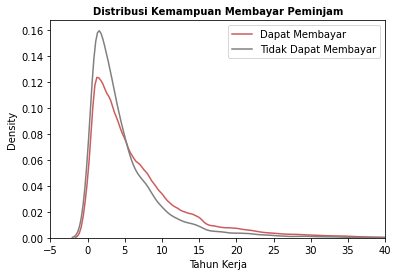

In [44]:
# Menampilkan distribusi kemampuan peminjam membayar pinjaman berdasarkan lama bekerja
plt.title("Distribusi Kemampuan Membayar Peminjam",fontsize=10,weight="bold")
sns.distplot(df[df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label="Dapat Membayar", color = 'indianred')
sns.distplot(df[df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label="Tidak Dapat Membayar", color = 'grey')
plt.xlim([-5,40])
plt.xlabel("Tahun Kerja")
plt.legend();

Berdasarkan displot yang telah ditampilkan, diketahui bahwa pelanggan dengan masa kerja kurang dari 5 tahun cenderung untuk tidak dapat membayarkan kembali pinjaman atau default, terutama pekerja dengan masa kerja kurang dari 2 tahun. Sebaliknya, pelanggan dengan masa kerja lebih dari 5 tahun lebih cenderung dapat membayarkan pinjamannya.

In [45]:
# Mengubah DAYS_REGISTRATION menjadi YEARS_REGISTRATION
df['YEARS_REGISTRATION'] = round((df['DAYS_REGISTRATION']/-365), 0).astype(int)

# Menghapus kolom DAYS_REGISTRATION
df.drop(columns='DAYS_REGISTRATION', inplace=True)

In [46]:
# Menampilkan deskripsi data Years Registration
df['YEARS_REGISTRATION'].describe()

count    307511.000000
mean         13.659440
std           9.659369
min           0.000000
25%           6.000000
50%          12.000000
75%          20.000000
max          68.000000
Name: YEARS_REGISTRATION, dtype: float64

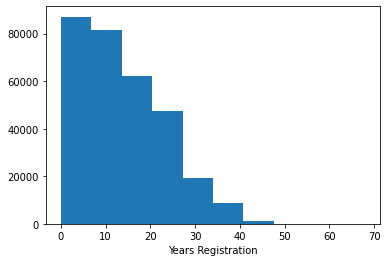

In [47]:
# Menampilkan distribusi nilai dari data Years Registration 
plt.hist(df['YEARS_REGISTRATION'])
plt.xlabel('Years Registration')
plt.show()

In [48]:
# Membuat kelompok lama waktu registrasi dalam tahun 
grp_regist = df[['TARGET', 'YEARS_REGISTRATION']] 
grp_regist['YEARS_REGISTRATION_GROUP'] = pd.cut(grp_regist['YEARS_REGISTRATION'], bins = np.linspace(0, 70, num=8))

# Membuat variabel rata-rata target dan lama waktu registrasi berdasarkan kelompok lama waktu registrasi
grp_regist = (grp_regist.groupby(['YEARS_REGISTRATION_GROUP']).mean())
grp_regist

,TARGET,YEARS_REGISTRATION
YEARS_REGISTRATION_GROUP,,
"(0.0, 10.0]",0.089018,5.111803
"(10.0, 20.0]",0.082636,14.994528
"(20.0, 30.0]",0.065393,24.813166
"(30.0, 40.0]",0.056071,34.209956
"(40.0, 50.0]",0.041252,43.170697
"(50.0, 60.0]",0.033333,53.966667
"(60.0, 70.0]",0.111111,63.111111


In [49]:
# Menampilkan unique value beserta jumlahnya dari setiap kolom dataset df
for col in df.select_dtypes("object").columns: 
  print(df[col].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUC

Berdasarkan output di atas, dapat dilihat bahwa kolom yang memiliki XNA sebagai unique value adalah CODE_GENDER dan ORGANIZATION_TYPE.

In [50]:
#Mengubah nilai XNA menjadi NaN di kolom Code Gender
df['CODE_GENDER'].replace("XNA", np.nan, inplace=True)  

#mengubah nilai XNA menjadi NaN di kolom Organization Type
df['ORGANIZATION_TYPE'].replace("XNA", np.nan, inplace=True)  

###Handling Missing Value

In [51]:
# Menghapus kolom dengan jumlah null lebih dari 60 %
df.drop(columns=list(data_null['index'].loc[data_null['Persen'] >60]), inplace=True)
df.shape

(307511, 107)

In [52]:
# Membuat tabel untuk kolom yang berisi missing value
null = df.isnull().sum().reset_index()  
null_table = null.loc[null[0] > 0] 
null_table.shape

(55, 2)

Terdapat 55 kolom yang memiliki missing value kurang dari 60%.

In [53]:
# Mengisi missing value
col_numeric = df.select_dtypes(exclude = ["object"] ).columns 
for col in col_numeric :
  df[col] = df[col].fillna(df[col].median())


col_object = df.select_dtypes(include = ["object"]).columns 
for col in col_object :
  df[col] = df[col].fillna(df[col].mode().iloc[0])

In [54]:
# Mengecek kembali missing value
null = df.isnull().sum().reset_index() 
null_table = null.loc[null[0] > 0] 
null_table.shape[0]

0

Dapat dilihat bahwa jumlah null dalam seluruh kolom di dataframe df adalah 0 sehingga dataframe df sudah tidak memiliki missing value.

In [55]:
# Menyimpan dataset yang sudah dibersihkan
#df.to_csv('/content/Dataset_HCI_Ready.csv')

In [56]:
#Mengubah DAYS_ID_PUBLISH menjadi YEARS_PUBLISHED
df['YEARS_PUBLISHED'] = round((df['DAYS_ID_PUBLISH']/-365), 0).astype(int)

#menghapus kolom DAYS_ID_PUBLISH
df.drop(columns='DAYS_ID_PUBLISH', inplace=True)

In [57]:
# Menampilkan deskripsi data Years Published
df['YEARS_PUBLISHED'].describe() 

count    307511.000000
mean          8.198575
std           4.151520
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_PUBLISHED, dtype: float64

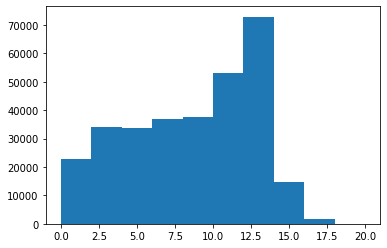

In [58]:
# Menampilkan distribusi nilai dari kolom Years Published
plt.hist(df['YEARS_PUBLISHED'])
plt.show()

In [59]:
# Membuat kelompok lama waktu published dalam tahun 
grp_publish = df[['TARGET', 'YEARS_PUBLISHED']]
grp_publish['YEARS_PUBLISHED_GROUP'] = pd.cut(grp_publish['YEARS_PUBLISHED'], bins = np.linspace(0, 20, num=6)) 

# Membuat variabel rata-rata target dan years published berdasarkan kelompok waktu years published
grp_publish = (grp_publish.groupby(['YEARS_PUBLISHED_GROUP']).mean())
grp_publish

,TARGET,YEARS_PUBLISHED
YEARS_PUBLISHED_GROUP,,
"(0.0, 4.0]",0.098844,2.537650
"(4.0, 8.0]",0.088782,6.545368
"(8.0, 12.0]",0.072191,10.890039
"(12.0, 16.0]",0.060282,13.462728
"(16.0, 20.0]",0.056180,17.011236


In [60]:
# Mengubah DAYS_LAST_PHONE_CHANGE menjadi YEAR_LAST_PHONE_CHANGE
df['YEAR_LAST_PHONE_CHANGE'] = round((df['DAYS_LAST_PHONE_CHANGE']/-365), 0).astype(int)

# Menghapus kolom DAYS_LAST_PHONE_CHANGE
df.drop(columns='DAYS_LAST_PHONE_CHANGE', inplace=True)

In [61]:
# Menampilkan deskripsi data YEAR_LAST_PHONE_CHANGE
df['YEAR_LAST_PHONE_CHANGE'].describe() 

count    307511.000000
mean          2.632868
std           2.281341
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEAR_LAST_PHONE_CHANGE, dtype: float64

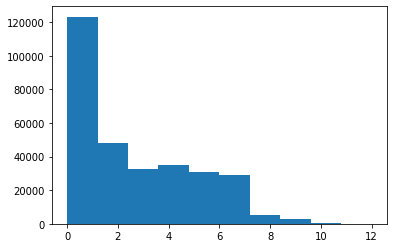

In [62]:
# Menampilkan distribusi nilai dalam kolom YEAR_LAST_PHONE_CHANGE
plt.hist(df['YEAR_LAST_PHONE_CHANGE'])
plt.show()

In [63]:
# Menggabungkan kolom Flag Document
regex = re.compile('FLAG_DOCUMENT_')
col = [i for i in df.columns 
       if re.match(regex, i)]

In [64]:
# Menggabungkan data Flag Document
df['TOTAL_DOCUMENT'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21'] 

In [65]:
# Menghapus kolom Flag Document
df.drop(columns = [i for i in df.columns if re.match(regex, i)], inplace=True)

In [66]:
# Menampilkan jumlah unik value pada data Total Document
df['TOTAL_DOCUMENT'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: TOTAL_DOCUMENT, dtype: int64

In [67]:
# Mengubah nilai data Total Document menjadi 1 dan 0
doc_list = []
for index, column in df.iterrows():
    if column['TOTAL_DOCUMENT'] >= 1:
        doc = 1
    else:
        doc = 0
    doc_list.append(doc)

df['DOC_PROVIDED'] = doc_list

In [68]:
# Menampilkan rata-rata target berdasarkan Doc Provided
doc_data = df.groupby(['DOC_PROVIDED']).agg({'TARGET':'mean'}).reset_index()
doc_data

,DOC_PROVIDED,TARGET
0,0,0.055230
1,1,0.083439


In [69]:
#mengubah tipe data pada kolom DOC_PROVIDED menjadi integer
doc_data['DOC_PROVIDED'] = doc_data['DOC_PROVIDED'].astype(int) 

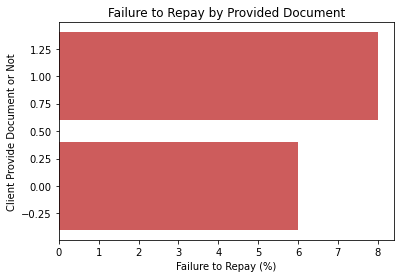

In [70]:
# Menampilkan persentase kegagalan membayar berdasarkan Provided Document
plt.barh(range(0,2), round(100*doc_data['TARGET']), color='indianred')
plt.ylabel('Client Provide Document or Not')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Provided Document')
plt.show()

In [71]:
# Menghapus kolom SK_ID_CURR 
df = df.drop(['SK_ID_CURR'], 1) 

###**Scaling Numerical Values**

In [72]:
# Menampilkan kolom-kolom dalam df yang bertipe data selain object
df[df.select_dtypes(exclude = ["object"]).columns].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,26,2.0,10,6,3,1,1
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0.0714,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,46,3.0,3,1,2,1,1
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,52,1.0,12,7,2,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,52,8.0,27,7,2,1,1
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,55,8.0,12,9,3,1,1


In [73]:
# Scaling terhadap kolom yang bertipe data selain object
scaler = MinMaxScaler()
scal_num = df.select_dtypes(exclude = ["object"]).columns
scal_numeric = scal_num[2:]
scalled = pd.DataFrame(df)
scalled[scal_numeric] = scaler.fit_transform(df[scal_numeric])

In [74]:
#menampilkan 5 baris data pertama dari df setelah scalling 
df.head() 

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,Cash loans,M,N,Y,0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0
1,0,Cash loans,F,N,N,0,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,0.002874,0.000000,0.002907,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.520833,0.061224,0.044118,0.05,0.166667,0.25,1.0
2,0,Revolving loans,M,Y,Y,0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.645833,0.020408,0.176471,0.35,0.166667,0.00,0.0
3,0,Cash loans,F,N,Y,0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,P

###**Encoding Categorical Variables**

In [75]:
# Menampilkan kolom-kolom yang bertipe data object pada dataframe df
df[df.select_dtypes(include = ["object"]).columns].head() 

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


In [76]:
# Menampilkan jumlah unique value dari setiap kolom pada df
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0) 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Melakukan encoding pada kolom yang memiliki 2 unique value. 

In [77]:
# Mengubah data ketegori menjadi data numerik untuk kolom dengan 2 unique value
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])            
            le_count += 1
           
print('Total label encoded columns: %d' % le_count)

Total label encoded columns: 5


In [78]:
#menampilkan 5 baris data pertama dari df setelah encoding
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",0,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,0,0.002874,0.000000,0.002907,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.520833,0.061224,0.044118,0.05,0.166667,0.25,1.0
2,0,1,1,1,1,0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.645833,0.020408,0.176471,0.35,0.166667,0.00,0.0
3,0,0,0,0,1,0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,0,0.005747,0.000000,0.005814,0.000000,0

Melakukan encoding menggunakan untuk kolom yang memiliki unique value lebih dari 2. 

In [79]:
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) > 2:
            onehots = pd.get_dummies(df[col])
            df = df.join(onehots)
            df.drop(columns=col, inplace=True)
            le_count += 1
           
print('Total one hot encoded columns: %d' % le_count)

Total one hot encoded columns: 10


In [80]:
# Menampilkan ukuran dataset df setelah encoding
df.shape 

(307511, 202)

In [81]:
#menampilkan 5 baris data pertama dari df setelah encoding
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,0,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.98

###**Feature Selection**

Korelasi kolom-kolom pada dataset df terhadap kolom Target.

In [82]:
df_corr = df.corr()['TARGET'].sort_values().reset_index()

In [83]:
# Menampilkan 9 kolom teratas yang memiliki korelasi positif
print('Most Positive Correlations:\n', df_corr.tail(9))

Most Positive Correlations:
                              index    TARGET
193         REG_CITY_NOT_LIVE_CITY  0.044395
194                 FLAG_EMP_PHONE  0.045982
195  Secondary / secondary special  0.049824
196         REG_CITY_NOT_WORK_CITY  0.050994
197                    CODE_GENDER  0.054713
198                        Working  0.057481
199           REGION_RATING_CLIENT  0.058899
200    REGION_RATING_CLIENT_W_CITY  0.060893
201                         TARGET  1.000000


In [84]:
# Menampilkan 13 kolom terbawah yang memiliki korelasi negatif
print('\nMost Negative Correlations:\n', df_corr.head(13))


Most Negative Correlations:
                      index    TARGET
0             EXT_SOURCE_2 -0.160295
1             EXT_SOURCE_3 -0.155892
2             EXT_SOURCE_1 -0.098887
3                      AGE -0.078263
4           YEARS_EMPLOYED -0.065095
5         Higher education -0.056593
6   YEAR_LAST_PHONE_CHANGE -0.054345
7          YEARS_PUBLISHED -0.051353
8                Pensioner -0.046209
9       YEARS_REGISTRATION -0.041820
10         AMT_GOODS_PRICE -0.039623
11           FLOORSMAX_AVG -0.039385
12          FLOORSMAX_MEDI -0.039157


In [85]:
# Membuat kolom yang memiliki nilai korelasi lebih dari atau sama dengan 0.04 (positif atau negatif)
column = ['AMT_CREDIT','REG_CITY_NOT_LIVE_CITY','FLAG_EMP_PHONE','Secondary / secondary special','REG_CITY_NOT_WORK_CITY',
          'CODE_GENDER','Working','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
          'EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','AGE','YEARS_EMPLOYED',
          'Higher education','YEAR_LAST_PHONE_CHANGE','YEARS_PUBLISHED','Pensioner',
          'YEARS_REGISTRATION','AMT_GOODS_PRICE','FLOORSMAX_AVG','FLOORSMAX_MEDI','TARGET']

In [86]:
# Menampilkan data pada kolom yang memiliki nilai korelasi lebih dari atau sama dengan 0.04 (positif atau negatif)
df_column = df[column]
df_column.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET
0,0.090287,0.0,1.0,1,0.0,1,1,0.5,0.5,0.307542,0.155054,0.072215,0.104167,0.040816,0,0.250000,0.30,0,0.147059,0.077441,0.0833,0.0833,1
1,0.311736,0.0,1.0,0,0.0,0,0,0.0,0.0,0.727773,0.597163,0.312933,0.520833,0.061224,1,0.166667,0.05,0,0.044118,0.271605,0.2917,0.2917,0
2,0.022472,0.0,1.0,1,0.0,1,1,0.5,0.5,0.650190,0.814130,0.518318,0.645833,0.020408,0,0.166667,0.35,0,0.176471,0.023569,0.1667,0.1667,0
3,0.066837,0.0,1.0,1,0.0,0,1,0.5,0.5,0.760751,0.597163,0.518318,0.645833,0.163265,0,0.166667,0.35,0,0.397059,0.063973,0.1667,0.1667,0
4,0.116854,0.0,1.0,1,1.0,1,1,0.5,0.5,0.377472,0.597163,0.518318,0.708333,0.163265,0,0.250000,0.45,0,0.176471,0.117845,0.1667,0.1667,0
5,0.111235,0.0,1.0,1,0.0,1,0,0.5,0.5,0.414298,0.693145,0.518318,0.520833,0.081633,0,0.583333,0.05,0,0.205882,0.103255,0.1667,0.1667,0
6,0.378458,0.0,1.0,0,0.0,0,0,0.5,0.5,0.846784,0.548903,0.801786,0.354167,0.183673,1,0.333333,0.10,0,0.044118,0.337823,0.1667,0.1667,0
7,0.370787,0.0,1.0,0,1.0,1,0,1.0,1.0,0.835415,0.603169,0.518318,0.645833,0.020408,1,0.250000,0.35,0,0.191176,0.371493,0.1667,0.1667,0
8,0.243348,0.0,0.0,1,0.0,0,0,0.5,0.5,0.240640,0.838874,0.604104,0.708333,0.102041,0,0.000000,0.50,1,0.294118,0.217733,0.1667,0.1667,0
9,0.089888,0.0,1.0,1,0.0,1,1,0.5,0.5,0.873268,0.597163,0.518318,0.395833,0.122449,0,0.416667,0.55,0,0.588235,0.090909,0.1667,0.1667,0


In [87]:
# Menyimpan dataset yang siap untuk modelling
df.to_csv('/content/Dataset_HCI_FeatureReady.csv')

In [88]:
# Menampilkan ukuran dataset untuk modelling
df_column.shape

(307511, 23)

## **Modelling**

In [89]:
# Import library
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [90]:
# evaluasi report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [91]:
# Membuat variabel latih dan variabel target
X = df_column.drop(['TARGET'], axis=1)
y = df_column['TARGET']

In [92]:
# Menampilkan ukuran variabel latih
X.shape

(307511, 22)

In [93]:
# Menyeimbangkan vatiabel latih dan variabel target
X_over_smote, y_over_smote = over_sampling.SMOTE(0.5).fit_resample(X, y)
print('SMOTE')
print(pd.Series(y_over_smote).value_counts())

SMOTE
0    282686
1    141343
Name: TARGET, dtype: int64


In [94]:
# Menyimpan dataset yang telah diseimbangkan
data_train = X_over_smote
data_train['TARGET'] = pd.DataFrame(y_over_smote)

In [95]:
# Menampilkan 10 data teratas pada data train
data_train.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET
0,0.090287,0.0,1.0,1,0.0,1,1,0.5,0.5,0.307542,0.155054,0.072215,0.104167,0.040816,0,0.250000,0.30,0,0.147059,0.077441,0.0833,0.0833,1
1,0.311736,0.0,1.0,0,0.0,0,0,0.0,0.0,0.727773,0.597163,0.312933,0.520833,0.061224,1,0.166667,0.05,0,0.044118,0.271605,0.2917,0.2917,0
2,0.022472,0.0,1.0,1,0.0,1,1,0.5,0.5,0.650190,0.814130,0.518318,0.645833,0.020408,0,0.166667,0.35,0,0.176471,0.023569,0.1667,0.1667,0
3,0.066837,0.0,1.0,1,0.0,0,1,0.5,0.5,0.760751,0.597163,0.518318,0.645833,0.163265,0,0.166667,0.35,0,0.397059,0.063973,0.1667,0.1667,0
4,0.116854,0.0,1.0,1,1.0,1,1,0.5,0.5,0.377472,0.597163,0.518318,0.708333,0.163265,0,0.250000,0.45,0,0.176471,0.117845,0.1667,0.1667,0
5,0.111235,0.0,1.0,1,0.0,1,0,0.5,0.5,0.414298,0.693145,0.518318,0.520833,0.081633,0,0.583333,0.05,0,0.205882,0.103255,0.1667,0.1667,0
6,0.378458,0.0,1.0,0,0.0,0,0,0.5,0.5,0.846784,0.548903,0.801786,0.354167,0.183673,1,0.333333,0.10,0,0.044118,0.337823,0.1667,0.1667,0
7,0.370787,0.0,1.0,0,1.0,1,0,1.0,1.0,0.835415,0.603169,0.518318,0.645833,0.020408,1,0.250000,0.35,0,0.191176,0.371493,0.1667,0.1667,0
8,0.243348,0.0,0.0,1,0.0,0,0,0.5,0.5,0.240640,0.838874,0.604104,0.708333,0.102041,0,0.000000,0.50,1,0.294118,0.217733,0.1667,0.1667,0
9,0.089888,0.0,1.0,1,0.0,1,1,0.5,0.5,0.873268,0.597163,0.518318,0.395833,0.122449,0,0.416667,0.55,0,0.588235,0.090909,0.1667,0.1667,0


In [96]:
# Menampilkan ukuran data train
data_train.shape

(424029, 23)

In [97]:
# Membuat variabel latih dan variabel target setelah data diseimbangkan
X_smote = data_train.drop(['TARGET'], axis=1)
y_smote = data_train['TARGET']

In [98]:
# Split dataset
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=21)

### Logistic Regression

In [99]:
# Membuat model logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [100]:
# Memprediksi dataset menggunakan model logistic regression
y_smote_pred_lr = log_reg.predict(X_smote_test)

In [101]:
# Menampilkan skor prediksi
log_reg.score(X_smote_test, y_smote_test)

0.7144777492158574

In [102]:
# Menampilkan confusion matrix model logistic regression
cm_lr = confusion_matrix(y_smote_test, y_smote_pred_lr)
print ("Confusion Matrix : \n", cm_lr)

Confusion Matrix : 
 [[49892  6513]
 [17701 10700]]


<Figure size 576x576 with 0 Axes>

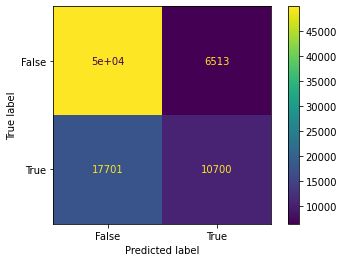

In [103]:
# Visualisasi confusion matrix model logistic regression
plt.figure(figsize = (8,8))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [104]:
# Menampilkan skor AUC model logistic regression
auc_lr = roc_auc_score(y_smote_test, log_reg.predict_proba(X_smote_test)[:,1])
print(auc_lr)

0.7445643097081538


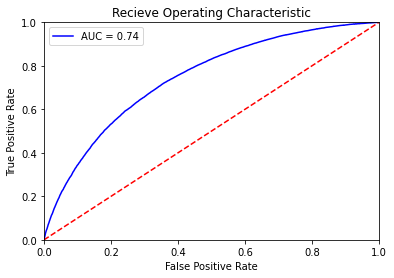

In [105]:
# Menampilkan kurva AUC model logistic regression
probs = log_reg.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [106]:
# Menampilkan report evaluasi model logistic regression
print (classification_report(y_smote_test, y_smote_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80     56405
           1       0.62      0.38      0.47     28401

    accuracy                           0.71     84806
   macro avg       0.68      0.63      0.64     84806
weighted avg       0.70      0.71      0.69     84806



### Decision Tree

In [107]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_smote_train, y_smote_train)

In [108]:
# Memprediksi dataset menggunakan model Decision Tree
y_smote_pred_dtree = dtree.predict(X_smote_test)

In [109]:
# Menampilkan skor prediksi model Decision Tree
print(dtree.score(X_smote_test, y_smote_test))

0.8467915006013725


In [110]:
# Menampilkan confusion matrix model Decision Tree
cm_dtree = metrics.confusion_matrix(y_smote_test, y_smote_pred_dtree)
print ("Confusion Matrix : \n", cm_dtree)

Confusion Matrix : 
 [[49340  7065]
 [ 5928 22473]]


<Figure size 720x720 with 0 Axes>

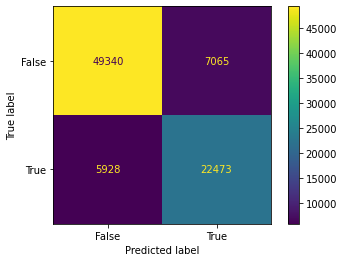

In [111]:
# Visualisasi confusion matrix model Decision Tree
plt.figure(figsize=(10,10))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_dtree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [112]:
# Menampilkan skor AUC model Decision Tree
auc_dtree = roc_auc_score(y_smote_test, dtree.predict_proba(X_smote_test)[:,1])
print(auc_dtree)

0.8330100509070334


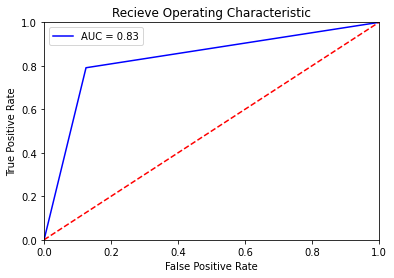

In [113]:
# Menampilkan kurva AUC model Decision Tree
probs = dtree.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [114]:
# Menampilkan report evaluasi model Decision Tree
print (classification_report(y_smote_test, y_smote_pred_dtree))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     56405
           1       0.76      0.79      0.78     28401

    accuracy                           0.85     84806
   macro avg       0.83      0.83      0.83     84806
weighted avg       0.85      0.85      0.85     84806



### Random Forest

In [115]:
# Membuat model Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [116]:
# Memprediksi data menggunakan model Random Forest Classifier
y_smote_pred_rfc = rfc.predict(X_smote_test)

In [117]:
# Menampilkan skor prediksi
print(rfc.score(X_smote_test, y_smote_test))

0.927882461146617


In [118]:
# Menampilkan confusion matrix model Random Forest Classifier
cm_rfc = metrics.confusion_matrix(y_smote_test, y_smote_pred_rfc)
print ("Confusion Matrix : \n", cm_rfc)

Confusion Matrix : 
 [[55622   783]
 [ 5333 23068]]


<Figure size 576x576 with 0 Axes>

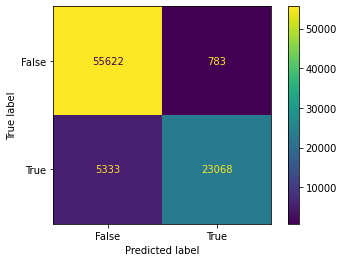

In [119]:
# Visualisasi confusion matrix model Random Forest Classifier
plt.figure(figsize = (8,8))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [120]:
# Menampilkan skor AUC model Random Forest Classifier
auc_rfc = roc_auc_score(y_smote_test, rfc.predict_proba(X_smote_test)[:,1])
print(auc_rfc)

0.9707529397431515


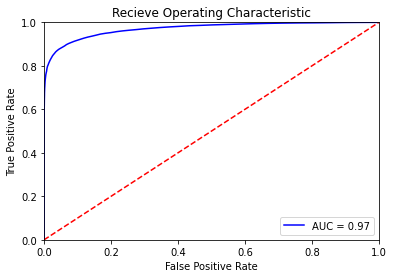

In [121]:
# Menampilkan kurva AUC model Random Forest Classifier
probs = rfc.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [122]:
# Menampilkan report evaluasi model Random Forest Classifier
print (classification_report(y_smote_test, y_smote_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     56405
           1       0.97      0.81      0.88     28401

    accuracy                           0.93     84806
   macro avg       0.94      0.90      0.92     84806
weighted avg       0.93      0.93      0.93     84806



### Naive Bayes Classifier

In [123]:
# Membuat model Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_smote_train, y_smote_train)

GaussianNB()

In [124]:
# Memprediksi dataset menggunakan model Naive Bayes Classifier
y_smote_pred_gnb = gnb.predict(X_smote_test)

In [125]:
# Menampilkan skor prediksi
print(gnb.score(X_smote_test, y_smote_test))

0.6543758696318657


In [126]:
# Menampilkan confusion matrix model Naive Bayes Classifier
cm_gnb = metrics.confusion_matrix(y_smote_test, y_smote_pred_gnb)
print ("Confusion Matrix : \n", cm_gnb)

Confusion Matrix : 
 [[36612 19793]
 [ 9518 18883]]


<Figure size 720x720 with 0 Axes>

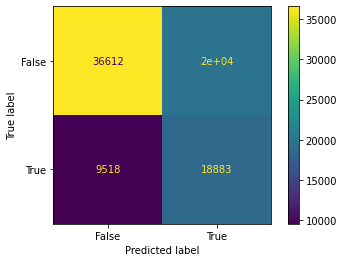

In [127]:
# Visualisasi confusion matrix model Naive Bayes Classifier
plt.figure(figsize=(10,10))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_gnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [128]:
# Menampilkan skor AUC model Naive Bayes Classifier
auc_gnb = roc_auc_score(y_smote_test, gnb.predict_proba(X_smote_test)[:,1])
print(auc_gnb)

0.7092417065597905


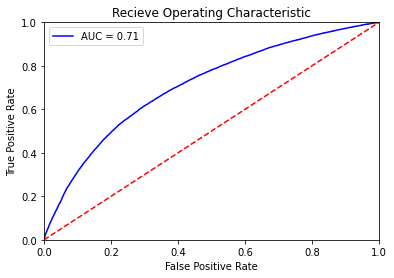

In [129]:
# Menampilkan kurva AUC model Naive Bayes Classifier
probs = gnb.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [130]:
# Menampilkan report evaluasi model Naive Bayes Classifier
print (classification_report(y_smote_test, y_smote_pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71     56405
           1       0.49      0.66      0.56     28401

    accuracy                           0.65     84806
   macro avg       0.64      0.66      0.64     84806
weighted avg       0.69      0.65      0.66     84806



Kesimpulan:
Berdasarkan 4 model yang telah kami buat, diperoleh bahwa model Random Forest Classifier memiliki nilai akurasi dan nilai auc yang tinggi, yaitu 0.91 dan 0.97 sehingga kami memilih menggunakan model tersebut.

## **Feature Importance**

In [131]:
# Menampilkan feature importance berdasarkan model Random Forest Classifier
features = X_smote.columns
features_impt_rfc = pd.DataFrame(rfc.feature_importances_, columns=["SCORE"])
features_impt_rfc['FEATURE'] = features 
feature_rfc = features_impt_rfc.sort_values('SCORE', ascending = False)
feature_rfc

,SCORE,FEATURE
13,0.115097,YEARS_EMPLOYED
15,0.105472,YEAR_LAST_PHONE_CHANGE
9,0.104838,EXT_SOURCE_2
10,0.102290,EXT_SOURCE_3
19,0.091191,AMT_GOODS_PRICE
16,0.089653,YEARS_PUBLISHED
0,0.073414,AMT_CREDIT
12,0.066669,AGE
18,0.062259,YEARS_REGISTRATION
11,0.053425,EXT_SOURCE_1


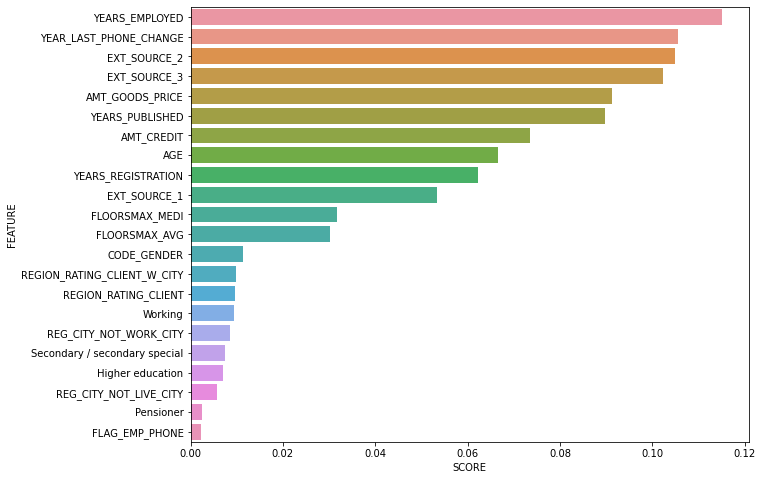

In [132]:
# Visualisasi feature importance berdasarkan model Random Forest Classifier
plt.figure(figsize=(10,8))
sns.barplot(data=feature_rfc, x='SCORE', y='FEATURE', orient='h')
plt.show()

In [133]:
# Menggabungkan hasil prediksi pada model Random Forest Classifier
X_smote_test['TARGET_PRED_RESULT'] = y_smote_pred_rfc
X_smote_test['TARGET'] = y_smote_test

In [134]:
# Menampilkan 10 teratas data X smote test
X_smote_test.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET_PRED_RESULT,TARGET
58543,0.201762,0.0,1.0,0,0.0,0,0,0.5,0.5,0.915004,0.597163,0.640750,0.187500,0.204082,1,0.333333,0.100000,0,0.441176,0.169473,0.333300,0.333300,0,0
326205,0.147499,0.0,1.0,1,0.0,0,1,0.5,0.5,0.574455,0.566832,0.470884,0.172961,0.110117,0,0.224821,0.434893,0,0.004443,0.141294,0.058131,0.058131,1,1
246540,0.213483,0.0,1.0,1,0.0,0,1,1.0,1.0,0.696629,0.413322,0.583537,0.541667,0.081633,0,0.000000,0.050000,0,0.382353,0.214366,0.166700,0.166700,0,0
343815,0.197387,0.0,1.0,0,1.0,0,0,1.0,1.0,0.500580,0.665205,0.608101,0.500077,0.065726,1,0.203738,0.111214,0,0.014706,0.176698,0.166700,0.166700,0,1
85445,0.059775,0.0,1.0,0,1.0,0,1,0.5,0.5,0.820428,0.223789,0.271471,0.270833,0.040816,1,0.083333,0.600000,0,0.264706,0.046016,0.166700,0.166700,0,0
205101,0.271847,0.0,1.0,1,0.0,0,1,0.5,0.5,0.696734,0.369325,0.518318,0.562500,0.183673,0,0.250000,0.150000,0,0.441176,0.236813,0.041700,0.041700,0,0
373536,0.111338,0.0,1.0,1,0.0,0,1,0.5,0.5,0.153530,0.419784,0.692908,0.273051,0.155662,0,0.083333,0.205322,0,0.157851,0.091506,0.166700,0.166700,1,1
369271,0.185939,0.0,0.0,1,0.0,1,0,0.5,0.5,0.227722,0.484400,0.518318,0.749910,0.102041,0,0.000000,0.559957,1,0.344156,0.160586,0.166700,0.166700,0,1
111715,0.225613,0.0,1.0,1,0.0,0,0,1.0,1.0,0.708982,0.923721,0.518318,0.729167,0.244898,0,0.333333,0.550000,0,0.191176,0.159371,0.083300,0.083300,0,0
184088,0.213483,0.0,1.0,0,1.0,0,1,0.5,0.5,0.639111,0.742982,0.787028,0.250000,0.081633,1,0.166667,0.450000,0,0.044118,0.214366,0.166700,0.166700,0,0


Loss Given Default Before Using Model

In [135]:
# Menampilkan total kredit berdasarkan target
Defaulters = X_smote_test.groupby(['TARGET'])['AMT_CREDIT'].sum().reset_index()
Defaulters

,TARGET,AMT_CREDIT
0,0,7832.258918
1,1,3551.280101


In [136]:
# Menampilkan jumlah kredit berdasarkan target
Total_Defaulters = X_smote_test.groupby(['TARGET'])['AMT_CREDIT'].count().reset_index()
Total_Defaulters

,TARGET,AMT_CREDIT
0,0,56405
1,1,28401


In [137]:
# Menampilkan total kredit yang default (sulit membayar kredit)
LGDBefore = Defaulters['AMT_CREDIT'].loc[Defaulters['TARGET'] == 1]
LGDBefore

1    3551.280101
Name: AMT_CREDIT, dtype: float64

Loss Given Default After Using Model

In [138]:
# Menampilkan data yang False Negative
FalseNegative = (X_smote_test.loc[(X_smote_test['TARGET'] == 1) & (X_smote_test['TARGET_PRED_RESULT'] == 0)])
FalseNegative.shape

(5333, 24)

In [139]:
# Menampilkan total kredit yang False Negative
LGDAfter = FalseNegative['AMT_CREDIT'].sum()
LGDAfter

721.5463873041558

In [140]:
# Selisih antara total kredit yang default dan total kredit yang False Negative
LGDAfter - LGDBefore

1   -2829.733714
Name: AMT_CREDIT, dtype: float64

In [141]:
# Persentase total kredit yang default dan total kredit yang False Negative
LGD_Decreased_Percentage = ((LGDAfter-LGDBefore)/LGDBefore)*100
LGD_Decreased_Percentage

1   -79.682076
Name: AMT_CREDIT, dtype: float64